## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data/data-clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))

display(df.head(2)), display(df.info()) ,display(df.isna().sum())

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       1537 non-null   object
 1   movie              1537 non-null   object
 2   production_budget  1537 non-null   int64 
 3   domestic_gross     1537 non-null   int64 
 4   worldwide_gross    1537 non-null   int64 
 5   foreign_gross      1537 non-null   int64 
 6   profit             1537 non-null   int64 
 7   genres             1537 non-null   object
 8   director           1537 non-null   object
dtypes: int64(5), object(4)
memory usage: 108.2+ KB


None

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
profit               0
genres               0
director             0
dtype: int64

(None, None, None)

### Business Recommendation 1: Which genres should we create films in? Which genres provide the highest average ROI?

Based on our business problem, we've decided to first conclude which genres these new films should be. We've chosen to do this by calculating the average return on investment for each genre and pulling the top 5 genres.

First we created columns that include domestic, foreign, and worlwide ROI for each movie title in our dataframe. We've also exploded the genre for each movie, so now each genre for each movie has it's own row. This will make it easier to find the average for each genre.

In [2]:
#drop duplicate movie tables
df = df.drop_duplicates(subset='movie', keep='first')

#create a new column that represents the roi for domestic gross
df['roi_domestic'] = (df['domestic_gross'] - df['production_budget']) / df['production_budget'] * 100

#create a new column that represents the roi for foreign gross
df['roi_foreign'] = (df['foreign_gross'] - df['production_budget']) / df['production_budget'] * 100

#create a new column that represents the roi for worlwide gross
df['roi_worldwide'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget'] * 100

df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall],-41.289850,95.957136,154.667286
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg],-87.782186,-69.428571,-57.210757


In [3]:
#filter the dataframe to only show movies released in the last ten years
df = df.loc[(df['release_date'] >= '2011-01-01')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1536
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1311 non-null   object 
 1   movie              1311 non-null   object 
 2   production_budget  1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   worldwide_gross    1311 non-null   int64  
 5   foreign_gross      1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   genres             1311 non-null   object 
 8   director           1311 non-null   object 
 9   roi_domestic       1311 non-null   float64
 10  roi_foreign        1311 non-null   float64
 11  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 133.1+ KB


In [4]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
df = df.explode('genres')#,ignore_index=True) 
df['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Western',
       'Family', 'Crime', 'Comedy', 'Animation', 'Horror', 'Drama',
       'Romance', 'Mystery', 'Musical', 'History', 'Documentary',
       'Biography', 'War', 'Sport', 'Music'], dtype=object)

Now that that's out of the way, we can begin to find the median ROI for each genre. We've chosen to use median because the data contains many outliers which would make the mean a less accurate representation of average ROI. We'll be choosing the top 5 genres based on their worlwide ROI, since this is a better indication of each films total ROI.

In [5]:
#I created a new dataframe that by genres and took the median for each column
filtered_df_median = df.groupby('genres').median()
#I am sorting the genres in descending order and only looking at the top 5 genres
filtered_df_median = filtered_df_median.sort_values(by=['roi_worldwide'], ascending = False)
filtered_df_median.head(5)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,roi_domestic,roi_foreign,roi_worldwide
genres,,,,,,,,
Mystery,12000000.0,25801570.0,45173738.0,26064449.0,36785387.0,56.965319,55.904993,227.818077
Animation,80000000.0,107514024.0,298374416.0,177037019.5,172705121.0,5.784405,83.082221,198.188978
Musical,39150000.0,21173039.5,55929699.0,34756659.5,20763733.0,-49.429681,42.465095,173.752303
Sci-Fi,93000000.0,79042440.0,242981799.0,164259216.0,128564919.0,-8.206552,69.339398,168.386218
Adventure,100000000.0,80085291.5,232342837.5,154937420.5,126986053.0,-8.951864,53.815108,162.363957


> Great, let's see those roi_worldwide averages compared visually


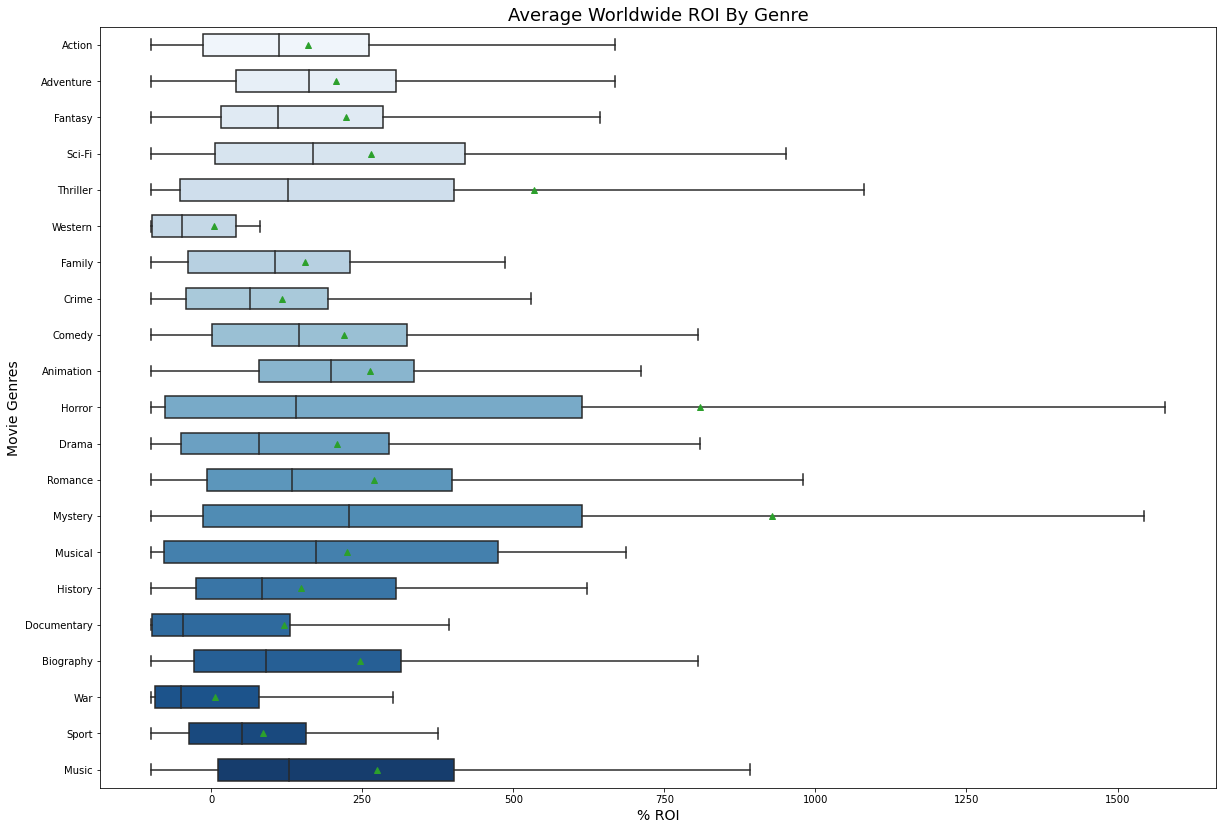

In [6]:
#creating a boxplot with the median and IDR for each genre
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=df["genres"], 
            x=df["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
            #removing outliers
            showfliers = False,
            #adding a green dot that shows mean for each genre
            showmeans = True);

#creating labels for my boxplot
plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI By Genre", size=18)
plt.show()

>We want to clear some of this noise and look only at the top 5 performing genres based on that average  worldwide ROI.

In [7]:
#creating an individual dataframe for each genre in my filtered_df_median dataframe
genres=df['genres'].unique().tolist()
musical = df.loc[df.genres=='Musical']
mystery = df.loc[df.genres=='Mystery']
scifi = df.loc[df.genres=='Sci-Fi']
adventure = df.loc[df.genres=='Adventure']
animation = df.loc[df.genres=='Animation']

In [8]:
#create a new dataframe with the top five average roi worldwide
top_5_ww = adventure.append(animation)
top_5_ww = top_5_ww.append(musical)
top_5_ww = top_5_ww.append(mystery)
top_5_ww = top_5_ww.append(scifi)

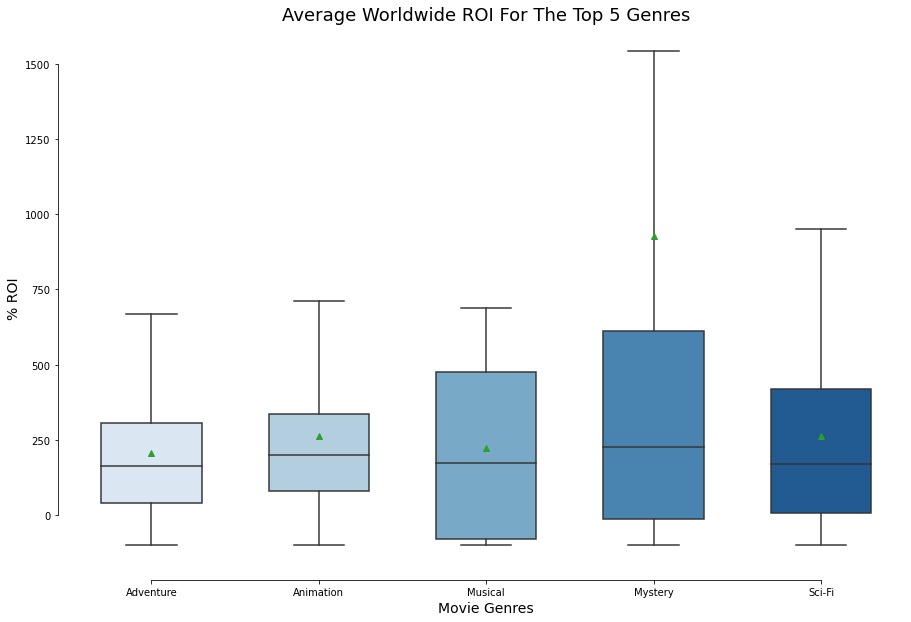

In [9]:
#create a box plot with all 5 top genres comparing median and mean
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_ww["genres"], 
            y=top_5_ww["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);


plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI For The Top 5 Genres", size=18)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Hide the vertical gridlines

sns.despine(offset=10, trim=True)
plt.show()

In [10]:
#let's predict worst, base, and best case scenarios for each genre
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = musical['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Musical ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 41% 
  Base Case = 162% 
  Best Case = 305%
Animation ROI: 
  Worst Case = 78% 
  Base Case = 198% 
  Best Case = 335%
Musical ROI: 
  Worst Case = -78% 
  Base Case = 173% 
  Best Case = 474%
Mystery ROI: 
  Worst Case = -13% 
  Base Case = 227% 
  Best Case = 613%
Sci-fi ROI: 
  Worst Case = 5% 
  Base Case = 168% 
  Best Case = 420%


We next decided to take a look at how each genre performed domestically, to see if it was necessary to release films in foreign countries. We were also curious to know if the top 5 genres in the USA were different than the top 5 genres worldwide

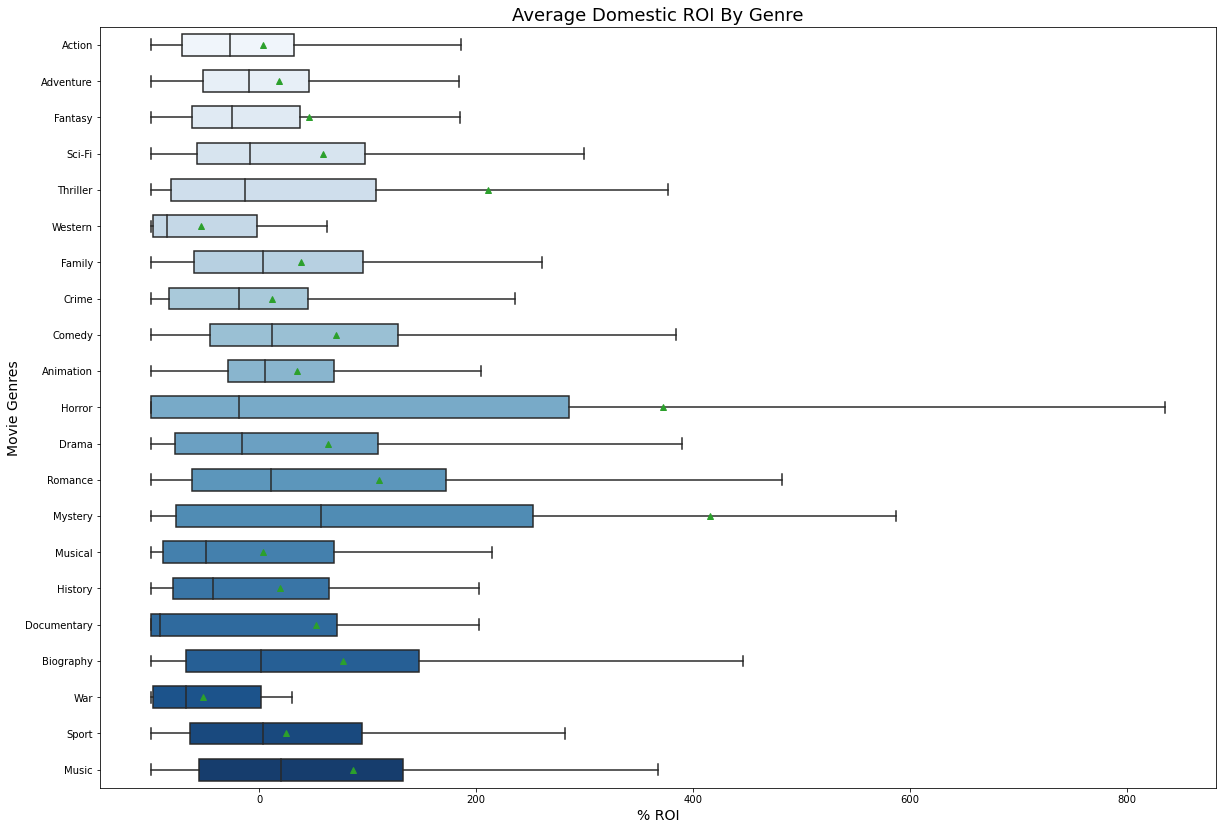

In [11]:
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=df["genres"], 
            x=df["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);

plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Domestic ROI By Genre", size=18)
plt.show()

In [12]:
#i know this worked because my rows went down from 5310 to 3945
filtered_df_median_dom = df.groupby('genres').median()
filtered_df_median_dom = filtered_df_median.sort_values(by=['roi_domestic'], ascending = False)
filtered_df_median_dom.head(5)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,roi_domestic,roi_foreign,roi_worldwide
genres,,,,,,,,
Mystery,12000000.0,25801570.0,45173738.0,26064449.0,36785387.0,56.965319,55.904993,227.818077
Music,14500000.0,16376066.0,31157914.0,7835022.0,11001573.0,20.438264,-38.546933,128.700183
Comedy,28000000.0,37243418.0,62758010.0,23046889.0,31239258.0,11.473743,-11.529117,144.709156
Romance,16000000.0,18729727.5,37682552.0,11190158.0,15492694.5,10.848518,-19.633567,133.868173
Animation,80000000.0,107514024.0,298374416.0,177037019.5,172705121.0,5.784405,83.082221,198.188978


>It looks like our top 5 genres in the USA are different from our top 5 genres in the world. Only two genres (mystery and animation) are in the top 5 for domestic and worlwide ROI. 

We next wanted to see the worst, base, and best case ROI for the top 5 genres in the USA

In [13]:
comedy = df.loc[df.genres=='Comedy']
music = df.loc[df.genres=='Music']
romance = df.loc[df.genres=='Romance']

In [14]:
top_5_df_domestic= animation.append(comedy)
top_5_df_domestic = top_5_df_domestic.append(music)
top_5_df_domestic = top_5_df_domestic.append(mystery)
top_5_df_domestic = top_5_df_domestic.append(romance)

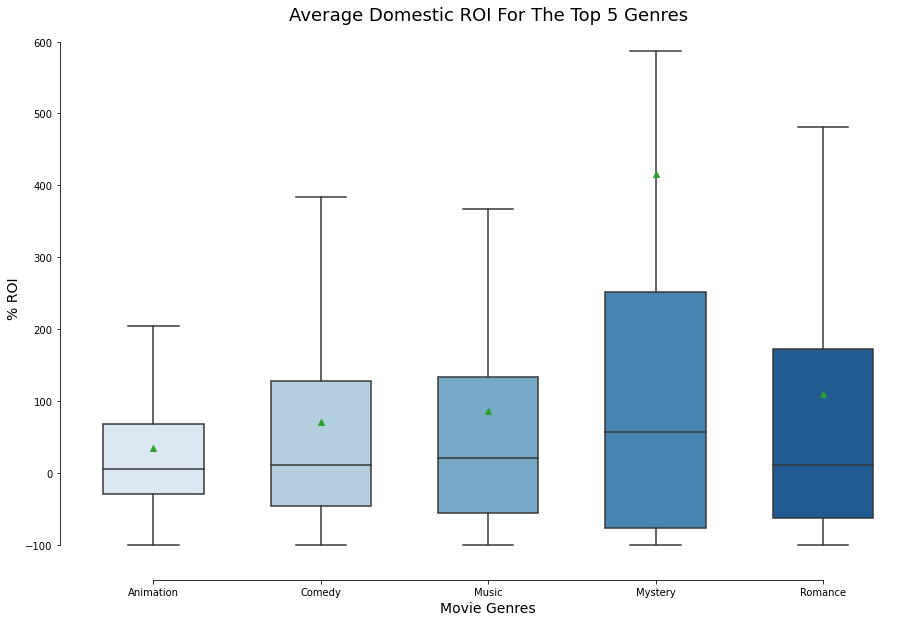

In [15]:
#created a box plot with top 5 genres in roi_domestic based on median
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_df_domestic["genres"], 
            y=top_5_df_domestic["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True,
            data=top_5_df_domestic.groupby('roi_domestic', as_index=False).median());

plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Domestic ROI For The Top 5 Genres", size=18)
#sns.stripplot(x="genres", y="roi_domestic", data=top_5_df_domestic)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(offset=10, trim=True)
plt.show()

In [16]:
#let's predict worst, base, and best case scenarios for each genre
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = music['roi_domestic']
arr4 = mystery['roi_domestic']
arr5 = romance['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Romance ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -28% 
  Base Case = 5% 
  Best Case = 68%
Comedy ROI: 
  Worst Case = -45% 
  Base Case = 11% 
  Best Case = 127%
Music ROI: 
  Worst Case = -55% 
  Base Case = 20% 
  Best Case = 133%
Mystery ROI: 
  Worst Case = -76% 
  Base Case = 56% 
  Best Case = 252%
Romance ROI: 
  Worst Case = -61% 
  Base Case = 10% 
  Best Case = 172%


### Business Recommendation 1: Conclusions

From what we see in the graph above and based on worst, base, and best case scenarios for each genre, we should create films in the adventure and animation genres. Although their best case ROI predictions are not as high as the mystery and musical genres, their worst case ROI predications are both far above 0%. 

All movies, no matter the genre, should be released worldwide and not just domestically, the worst case ROI predictions for each of the top 5 genres with highest average domestic ROI is below -25%.